<a href="https://colab.research.google.com/github/nimitsolanki/Cricket-World-Cup-2019/blob/master/Cricket_World_Cup_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CRICKET WORLD CUP 2019 - ICC CWC 2019**

Venue : ENGLAND

Total Teams : 10


Dataset - ODI_DATASET.csv

Starting from Jan-2013 to mid May-2019 - all the ODI results are included in this dataset




In [0]:
import warnings
warnings.filterwarnings('ignore')

# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
# ODI dataset from Jan-2013 to May-2019
# As I have used Google Colab to perform this notebook - hence added github raw URL to fetch the dataset

ODI_Data = pd.read_csv('https://raw.githubusercontent.com/nimitsolanki/Cricket-World-Cup-2019/master/data/ODI_DATASET.csv')

In [0]:
# Scores_ID

ODI_Data["Scores_ID"] = ODI_Data["Unnamed: 0"]
ODI_Data.drop(columns="Unnamed: 0",inplace=True)

In [0]:
# CWC-2019 pitches

WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol","Rose Bowl, Southampton","County Ground, Taunton","Old Trafford, Manchester","Edgbaston, Birmingham","Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]

#Total Grounds
WC_Ground_Stats = []
ODI_Grounds = ODI_Data.Ground
for i in ODI_Grounds:
    for j in WC_venue_pitches:
        if i in j:
          WC_Ground_Stats.append((i,j))   

In [5]:
# Listing ground names

Ground_names = dict(set(WC_Ground_Stats))
def Full_Ground_names(value):
    return Ground_names[value]
Ground_names

{'Birmingham': 'Edgbaston, Birmingham',
 'Bristol': 'County Ground, Bristol',
 'Cardiff': 'Sophia Gardens, Cardiff',
 'Chester-le-Street': 'Riverside Ground, Chester-le-Street',
 'Leeds': 'Headingley, Leeds',
 "Lord's": "Lord's, London",
 'Manchester': 'Old Trafford, Manchester',
 'Nottingham': 'Trent Bridge, Nottingham',
 'Southampton': 'Rose Bowl, Southampton',
 'The Oval': 'The Oval, London'}

In [6]:
# Matching ODI's data with respect to the above listed grounds

WC_Grounds_History = ODI_Data[ODI_Data.Ground.isin([Ground[0] for Ground in WC_Ground_Stats])]
WC_Grounds_History["Ground"] = WC_Grounds_History.Ground.apply(Full_Ground_names)
WC_Grounds_History.head()

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Scores_ID
74,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5,557
75,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1,844
76,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5,558
77,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1,845
78,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5,559


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

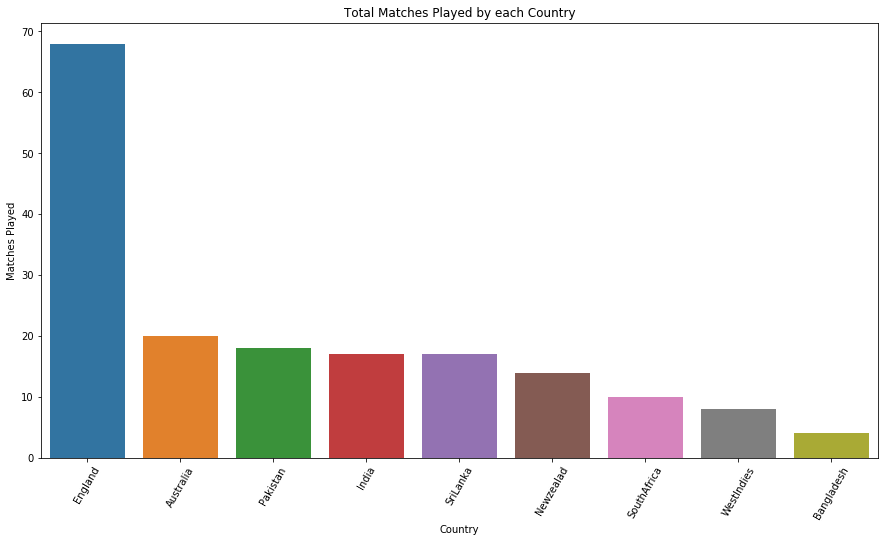

In [7]:
# Finding the World cup team's played on these grounds

Team_Matches = WC_Grounds_History.Country.value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "index", y = "Country", data = Team_Matches).set_title("Total Matches Played by each Country")
plt.xlabel("Country")
plt.ylabel("Matches Played")
plt.xticks(rotation = 60)


In [8]:
# Team wise Winning Percentage in England Pitches after removing the currupt data result

WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Result.isin(["-"])]
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
Name: Result, dtype: int64

In [9]:
# Country results in percentage 

winnings = WC_Grounds_History[["Country","Result"]]
winnings["count"] = 1
Ground_Results_Per_Team = winnings.groupby(["Country","Result"]).aggregate(["sum"])
Ground_Results_Per_Team = Ground_Results_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Ground_Results_Per_Team.columns = ["Country","Result","Count"]
Ground_Results_Per_Team.head()

,Country,Result,Count
0,Australia,lost,55.0
1,Australia,n/r,20.0
2,Australia,won,25.0
3,Bangladesh,lost,50.0
4,Bangladesh,n/r,25.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

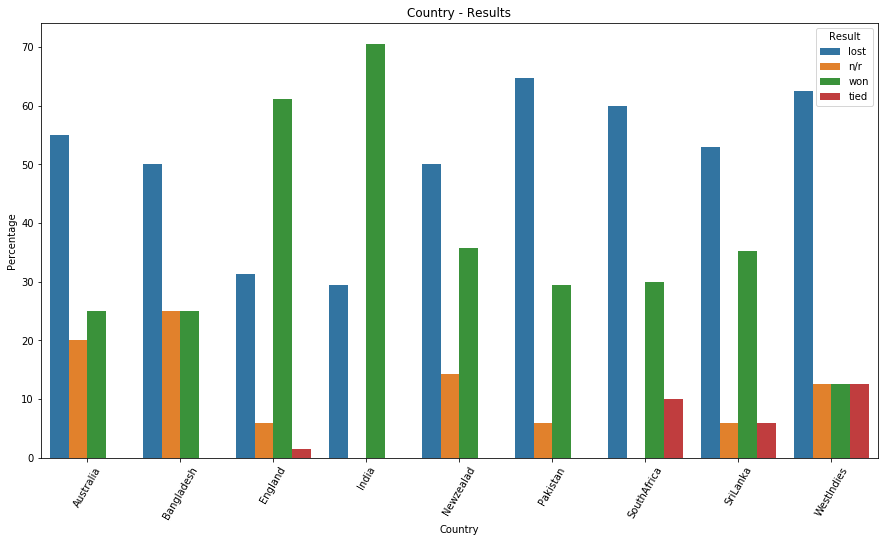

In [10]:
# Plotting Results in percentage

plt.figure(figsize=(15,8))
sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.ylabel("Percentage")
plt.title("Country - Results")
plt.xticks(rotation = 60)

It's clear that India and England have highest Green bars -  highest winning percentage.

Let's see what happens when the Top Two Teams face?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5, 0, 'India')

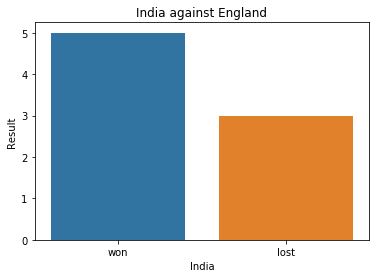

In [11]:
# It's WC final time - India Vs England

India_vs_England = WC_Grounds_History[WC_Grounds_History.Country == "India"]\
[WC_Grounds_History.Opposition.str.contains("England")]
India_vs_England = India_vs_England.Result.value_counts().reset_index()
sns.barplot(x = "index", y = "Result", data = India_vs_England).set_title("India against England")
plt.xlabel("India")

**Prediction : India will win ICC Cricket World Cup 2019**